In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
data=pd.read_csv('insurance.csv')

In [75]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [76]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:xlabel='sex', ylabel='charges'>

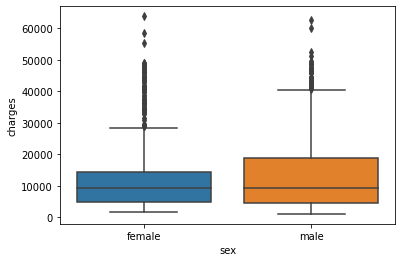

In [78]:
sns.boxplot(x=data.sex, y=data.charges)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

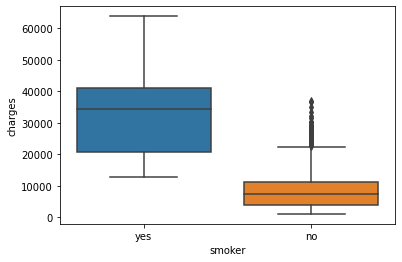

In [79]:
sns.boxplot(x=data.smoker, y=data.charges)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

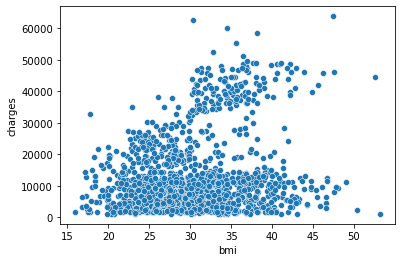

In [81]:
sns.scatterplot(x=data.bmi, y=data.charges)

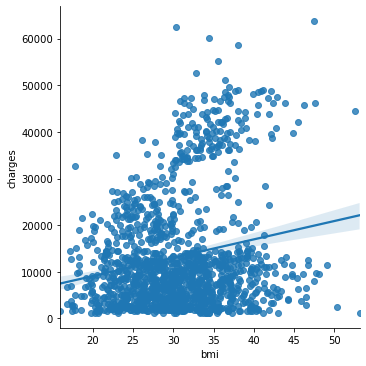

In [82]:
sns.lmplot(x='bmi', y='charges', data=data)

<AxesSubplot:xlabel='region', ylabel='charges'>

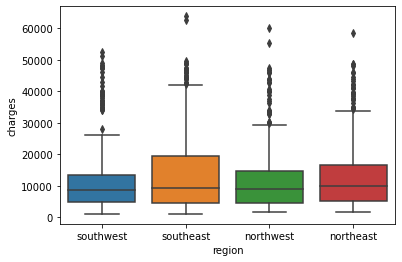

In [84]:
sns.boxplot(x=data.region, y=data.charges)

In [85]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [86]:
data=data.join(pd.get_dummies(data.sex)).drop(['sex','male'], axis=1)

In [87]:
data=data.join(pd.get_dummies(data.smoker, prefix='smok')).drop(['smoker','smok_no'], axis=1)

In [88]:
data.head()

,age,bmi,children,region,charges,female,smok_yes
0,19,27.900,0,southwest,16884.92400,1,1
1,18,33.770,1,southeast,1725.55230,0,0
2,28,33.000,3,southeast,4449.46200,0,0
3,33,22.705,0,northwest,21984.47061,0,0
4,32,28.880,0,northwest,3866.85520,0,0


In [89]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
le=LabelEncoder()

In [92]:
data=data.join(pd.DataFrame({'reg':le.fit_transform(data.region)})).drop(['region'], axis=1)

In [104]:
X=data.drop(['charges'], axis=1)

In [105]:
Y=data.charges

In [106]:
from sklearn.model_selection import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [133]:
from sklearn.linear_model import LinearRegression

In [134]:
from sklearn.linear_model import Ridge

In [135]:
model=Ridge(alpha=0.2)

In [136]:
#model=LinearRegression()

In [137]:
model.fit(X_train, y_train)

Ridge(alpha=0.2)

In [138]:
predict=model.predict(X_test)

In [139]:
from sklearn.metrics import r2_score

In [140]:
r2_score(y_test, predict)

0.7832968565888611

<AxesSubplot:xlabel='charges'>

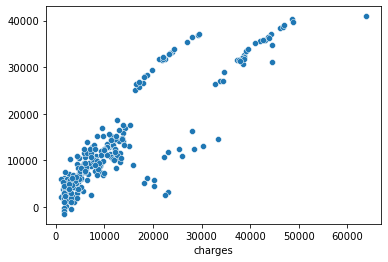

In [141]:
sns.scatterplot(x=y_test, y=predict)